#### AOS 575 - Multiple Linear Regression - Lecture 10/5/2020
by Elizabeth Maroon, with inspiration from Jen Kay's "multiple_linear_regression_grades.ipynb" <br>
Created 10/3/2020

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
#Load in data # Selecting only the end-November - December hourly data
filename='truax_2019.csv'
df=pd.read_csv(filename)
df=df[24*30*11:]  


In [4]:
#Look at your data!
print(df)

      year  month  day  hour  airtemp_degc  dewpoint_degc  slp_hpa  \
7920  2019     11   27     0           3.3            1.7   1006.0   
7921  2019     11   27     1           3.3            1.7   1004.4   
7922  2019     11   27     2           3.3            2.2   1002.7   
7923  2019     11   27     3           3.3            2.2   1001.1   
7924  2019     11   27     4           3.9            3.3    998.5   
...    ...    ...  ...   ...           ...            ...      ...   
8755  2019     12   31    19          -2.8           -7.2   1006.9   
8756  2019     12   31    20          -2.2           -7.2   1006.9   
8757  2019     12   31    21          -2.2           -7.2   1007.6   
8758  2019     12   31    22          -2.8           -7.8   1008.1   
8759  2019     12   31    23          -3.3           -8.3   1008.7   

      winddir_degrees  windspeed_ms  skycond_oktas  liqprec_mm  
7920             80.0           6.2            8.0         0.3  
7921             80.0        

Toy Example: Can we explain more of the variance in SLP using windspeed as a predictor alone, or does adding air temperature help?

In [5]:
#select variables
airtemp=df['airtemp_degc']
slp=df['slp_hpa']
windspeed=df['windspeed_ms']

#Clean up data; get rid of all NaNs
slp_nans=np.isnan(slp)
windsp_nans=np.isnan(windspeed)
airt_nans=np.isnan(airtemp)
all_nans=(~slp_nans) & (~windsp_nans) & (~airt_nans)

slp=slp[all_nans]
windspeed=windspeed[all_nans]
airtemp=airtemp[all_nans]

In [6]:
#Set independent and dependent variables
x1=windspeed
x2=airtemp
y=slp

#standardize all variables
x1_s=(x1-x1.mean())/x1.std()
x2_s=(x2-x2.mean())/x2.std()
y_s=(y-y.mean())/y.std()

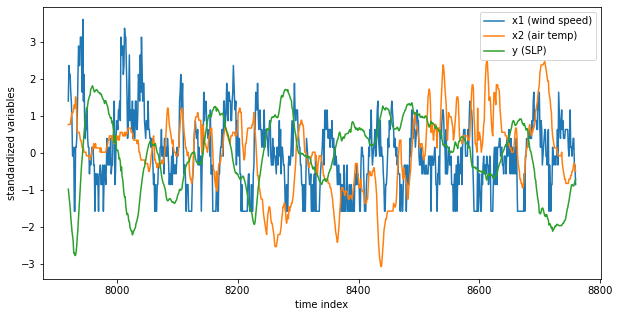

In [7]:
f=plt.figure(figsize=(10,5))
plt.plot(x1_s,label='x1 (wind speed)')
plt.plot(x2_s,label='x2 (air temp)')
plt.plot(y_s, label='y (SLP)')
plt.xlabel('time index')
plt.ylabel('standardized variables')
plt.legend()

In [8]:
# Calculate correlation statistics between x1 and y, 
slope, intercept, r_value_x1y, p_value, std_err = linregress(x1_s,y_s)
print('r_value_x1y (wind speed and SLP): ',round(r_value_x1y,2))

# Calculate correlation statistics between x2 and y, 
slope, intercept, r_value_x2y, p_value, std_err = linregress(x2_s,y_s)
print('r_value_x2y (air temperature and SLP): ',round(r_value_x2y,2))

# Calculate correlation statistics between x1 and x2, 
slope, intercept, r_value_x2x1, p_value, std_err = linregress(x2_s,x1_s)
print('r_value_x2x1 (wind speed and air temperature): ',round(r_value_x2x1,2))

r_value_x1y (wind speed and SLP):  -0.25
r_value_x2y (air temperature and SLP):  -0.42
r_value_x2x1 (wind speed and air temperature):  0.14


In [9]:
# Does adding x2 improve your ability to predict the y?
#Calculate the minimum useful correlation and compare it.
r_min=np.abs(r_value_x1y*r_value_x2x1)
print('minimum r needed to be useful(r_min)',round(r_min,2))
print('r_value_x2y: ',round(r_value_x2y,2))

if np.abs(r_value_x2y)>r_min:
    print('r_value_x2y exceeds r_min -- adding x2 is useful')
else:
    print('r_value_x2y does not exceed r_min -- not useful to add')

minimum r needed to be useful(r_min) 0.04
r_value_x2y:  -0.42
r_value_x2y exceeds r_min -- adding x2 is useful


In [10]:
# Ok let's do multiple linear regression using both predictors 
#using the Ordinary Least Squares algorithm from statsmodel packages
x = np.column_stack((x1_s,x2_s))  #combine both predictors
x = sm.add_constant(x, prepend=True)  
results = sm.OLS(y_s,x).fit()  #do the multiple linear regression

#print(results.summary()) #all sorts of statistics


Variance explained (R2) is larger with two predictors than with one: 0.22 > 0.18


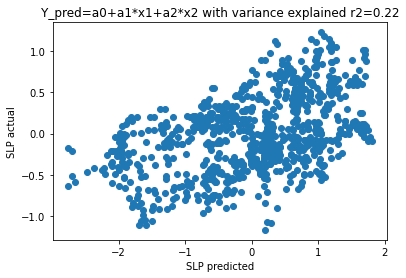

In [11]:
#see the results of the multiple linear regression
a0=results.params.const
a1=results.params.x1
a2=results.params.x2
r2=results.rsquared
y_pred=a0+a1*x1_s+a2*x2_s
plt.scatter(y_s,y_pred)
plt.xlabel('SLP predicted')
plt.ylabel('SLP actual')
plt.title('Y_pred=a0+a1*x1+a2*x2 with variance explained r2='+str(round(r2,2)))

print('Variance explained (R2) is larger with two predictors than with one: '+str(round(r2,2))+' > '+str(round(r_value_x2y*r_value_x2y,2)))